<a href="https://www.kaggle.com/code/avd1729/network-anomaly-detection-scratch?scriptVersionId=139020661" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Setting up the environment**

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# **Basic EDA**

In [2]:
data = pd.read_csv("/kaggle/input/network-anomaly-detection-dataset/all_data (3).csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ifInOctets11         4998 non-null   int64 
 1   ifOutOctets11        4998 non-null   int64 
 2   ifoutDiscards11      4998 non-null   int64 
 3   ifInUcastPkts11      4998 non-null   int64 
 4   ifInNUcastPkts11     4998 non-null   int64 
 5   ifInDiscards11       4998 non-null   int64 
 6   ifOutUcastPkts11     4998 non-null   int64 
 7   ifOutNUcastPkts11    4998 non-null   int64 
 8   tcpOutRsts           4998 non-null   int64 
 9   tcpInSegs            4998 non-null   int64 
 10  tcpOutSegs           4998 non-null   int64 
 11  tcpPassiveOpens      4998 non-null   int64 
 12  tcpRetransSegs       4998 non-null   int64 
 13  tcpCurrEstab         4998 non-null   int64 
 14  tcpEstabResets       4998 non-null   int64 
 15  tcp?ActiveOpens      4998 non-null   int64 
 16  udpInD

In [4]:
data.isnull().sum()

ifInOctets11           0
ifOutOctets11          0
ifoutDiscards11        0
ifInUcastPkts11        0
ifInNUcastPkts11       0
ifInDiscards11         0
ifOutUcastPkts11       0
ifOutNUcastPkts11      0
tcpOutRsts             0
tcpInSegs              0
tcpOutSegs             0
tcpPassiveOpens        0
tcpRetransSegs         0
tcpCurrEstab           0
tcpEstabResets         0
tcp?ActiveOpens        0
udpInDatagrams         0
udpOutDatagrams        0
udpInErrors            0
udpNoPorts             0
ipInReceives           0
ipInDelivers           0
ipOutRequests          0
ipOutDiscards          0
ipInDiscards           0
ipForwDatagrams        0
ipOutNoRoutes          0
ipInAddrErrors         0
icmpInMsgs             0
icmpInDestUnreachs     0
icmpOutMsgs            0
icmpOutDestUnreachs    0
icmpInEchos            0
icmpOutEchoReps        0
class                  0
dtype: int64

In [5]:
data['class'].value_counts()

tcp-syn       960
slowloris     780
udp-flood     773
icmp-echo     632
normal        600
httpFlood     573
slowpost      480
bruteForce    200
Name: class, dtype: int64

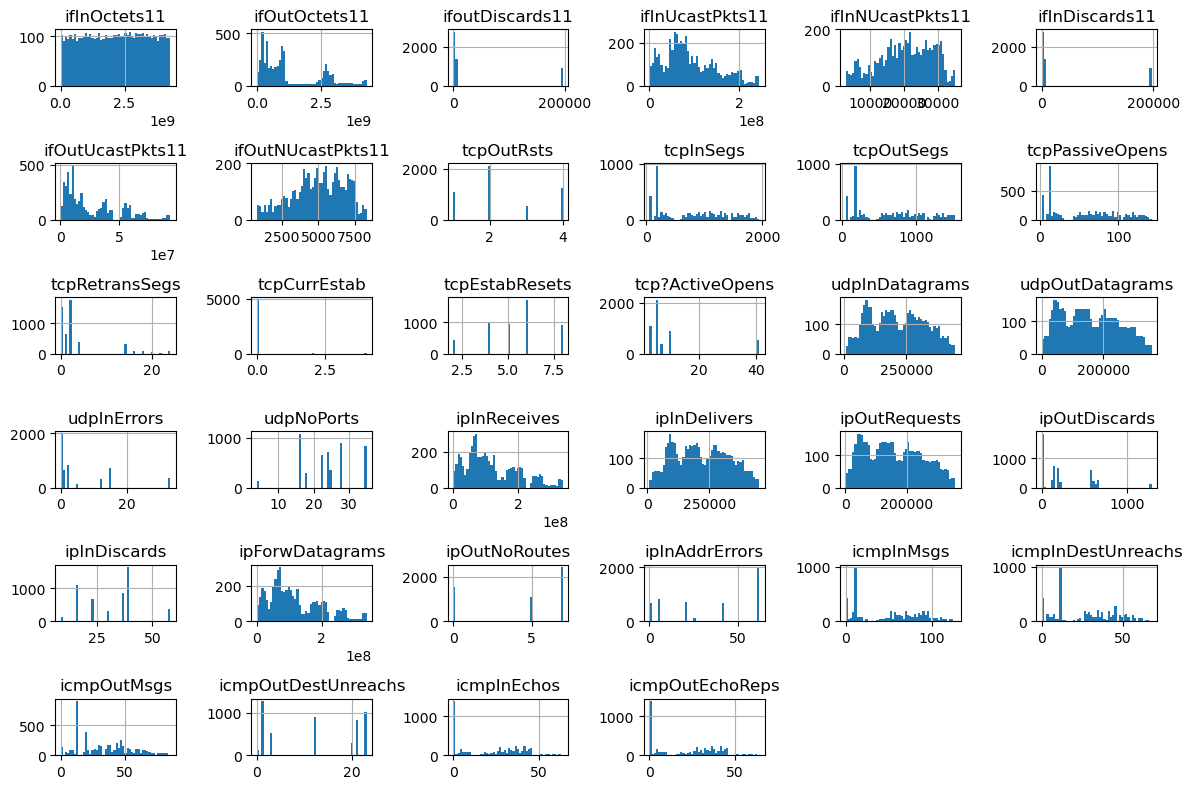

In [6]:
import matplotlib.pyplot as plt
data.hist(bins=50 , figsize=(12,8))
plt.tight_layout()
plt.show()

# **Data preprocessing**

In [7]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data[['class']] = encoder.fit_transform(data[['class']])

In [8]:
data.columns

Index(['ifInOctets11', 'ifOutOctets11', 'ifoutDiscards11', 'ifInUcastPkts11',
       'ifInNUcastPkts11', 'ifInDiscards11', 'ifOutUcastPkts11',
       'ifOutNUcastPkts11', 'tcpOutRsts', 'tcpInSegs', 'tcpOutSegs',
       'tcpPassiveOpens', 'tcpRetransSegs', 'tcpCurrEstab', 'tcpEstabResets',
       'tcp?ActiveOpens', 'udpInDatagrams', 'udpOutDatagrams', 'udpInErrors',
       'udpNoPorts', 'ipInReceives', 'ipInDelivers', 'ipOutRequests',
       'ipOutDiscards', 'ipInDiscards', 'ipForwDatagrams', 'ipOutNoRoutes',
       'ipInAddrErrors', 'icmpInMsgs', 'icmpInDestUnreachs', 'icmpOutMsgs',
       'icmpOutDestUnreachs', 'icmpInEchos', 'icmpOutEchoReps', 'class'],
      dtype='object')

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# **PCA**

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X = pca.fit_transform(data_scaled)

In [11]:
pca.n_components_

9

# **DBSCAN**

In [12]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5 , min_samples=3)
dbscan.fit(X)

DBSCAN(min_samples=3)

In [13]:
dbscan.labels_

array([ 0,  0,  0, ..., 50, 50, 50])

In [14]:
labels = dbscan.labels_

In [15]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points (anomalies): {n_noise}")

Estimated number of clusters: 51
Estimated number of noise points (anomalies): 65


In [16]:
data_new=pd.concat([data, pd.DataFrame({'type':labels})], axis=1)
data_new.head()

,ifInOctets11,ifOutOctets11,ifoutDiscards11,ifInUcastPkts11,ifInNUcastPkts11,ifInDiscards11,ifOutUcastPkts11,ifOutNUcastPkts11,tcpOutRsts,tcpInSegs,...,ipOutNoRoutes,ipInAddrErrors,icmpInMsgs,icmpInDestUnreachs,icmpOutMsgs,icmpOutDestUnreachs,icmpInEchos,icmpOutEchoReps,class,type
0,1867925250,902237363,0,52007310,16978,0,7197292,3968,1,682,...,7,0,49,26,46,23,23,23,3.0,0
1,1994338334,903845459,0,52098054,16986,0,7227073,3968,1,682,...,7,0,49,26,46,23,23,23,3.0,0
2,2116573334,905396546,0,52185853,16994,0,7255792,3969,1,682,...,7,0,49,26,46,23,23,23,3.0,0
3,2257767832,907308930,0,52287097,17015,0,7291152,3975,1,701,...,7,0,51,27,47,23,24,24,3.0,-1
4,2342047724,908534112,0,52347521,17043,0,7313830,3977,1,709,...,7,0,51,27,47,23,24,24,3.0,0


In [17]:
convert = lambda x : "anomalous" if(x == -1) else "normal"

In [18]:
data_new['type'] = data_new['type'].apply(convert)

In [19]:
data_new.head()

,ifInOctets11,ifOutOctets11,ifoutDiscards11,ifInUcastPkts11,ifInNUcastPkts11,ifInDiscards11,ifOutUcastPkts11,ifOutNUcastPkts11,tcpOutRsts,tcpInSegs,...,ipOutNoRoutes,ipInAddrErrors,icmpInMsgs,icmpInDestUnreachs,icmpOutMsgs,icmpOutDestUnreachs,icmpInEchos,icmpOutEchoReps,class,type
0,1867925250,902237363,0,52007310,16978,0,7197292,3968,1,682,...,7,0,49,26,46,23,23,23,3.0,normal
1,1994338334,903845459,0,52098054,16986,0,7227073,3968,1,682,...,7,0,49,26,46,23,23,23,3.0,normal
2,2116573334,905396546,0,52185853,16994,0,7255792,3969,1,682,...,7,0,49,26,46,23,23,23,3.0,normal
3,2257767832,907308930,0,52287097,17015,0,7291152,3975,1,701,...,7,0,51,27,47,23,24,24,3.0,anomalous
4,2342047724,908534112,0,52347521,17043,0,7313830,3977,1,709,...,7,0,51,27,47,23,24,24,3.0,normal


<Axes: xlabel='type', ylabel='count'>

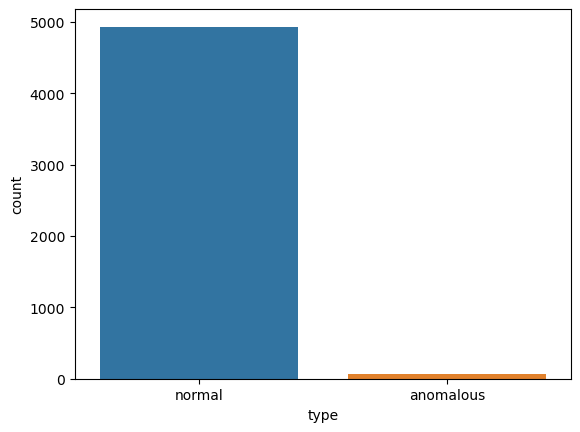

In [20]:
import seaborn as sn
sn.countplot(x='type' , data=data_new)

<Axes: xlabel='class', ylabel='count'>

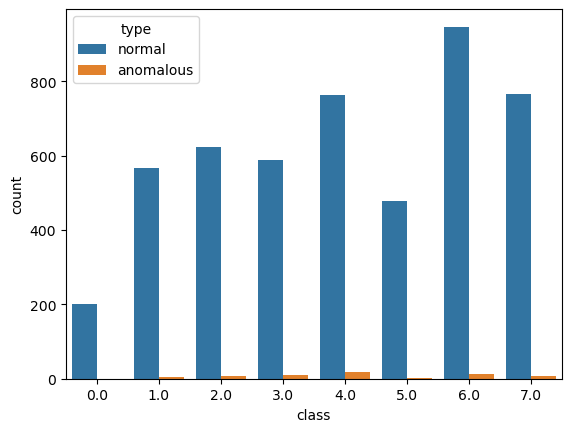

In [21]:
sn.countplot(x ='class',hue='type',data = data_new)

In [22]:
y = encoder.fit_transform(data_new[['type']])

Text(0, 0.5, 'Eigth Factor')

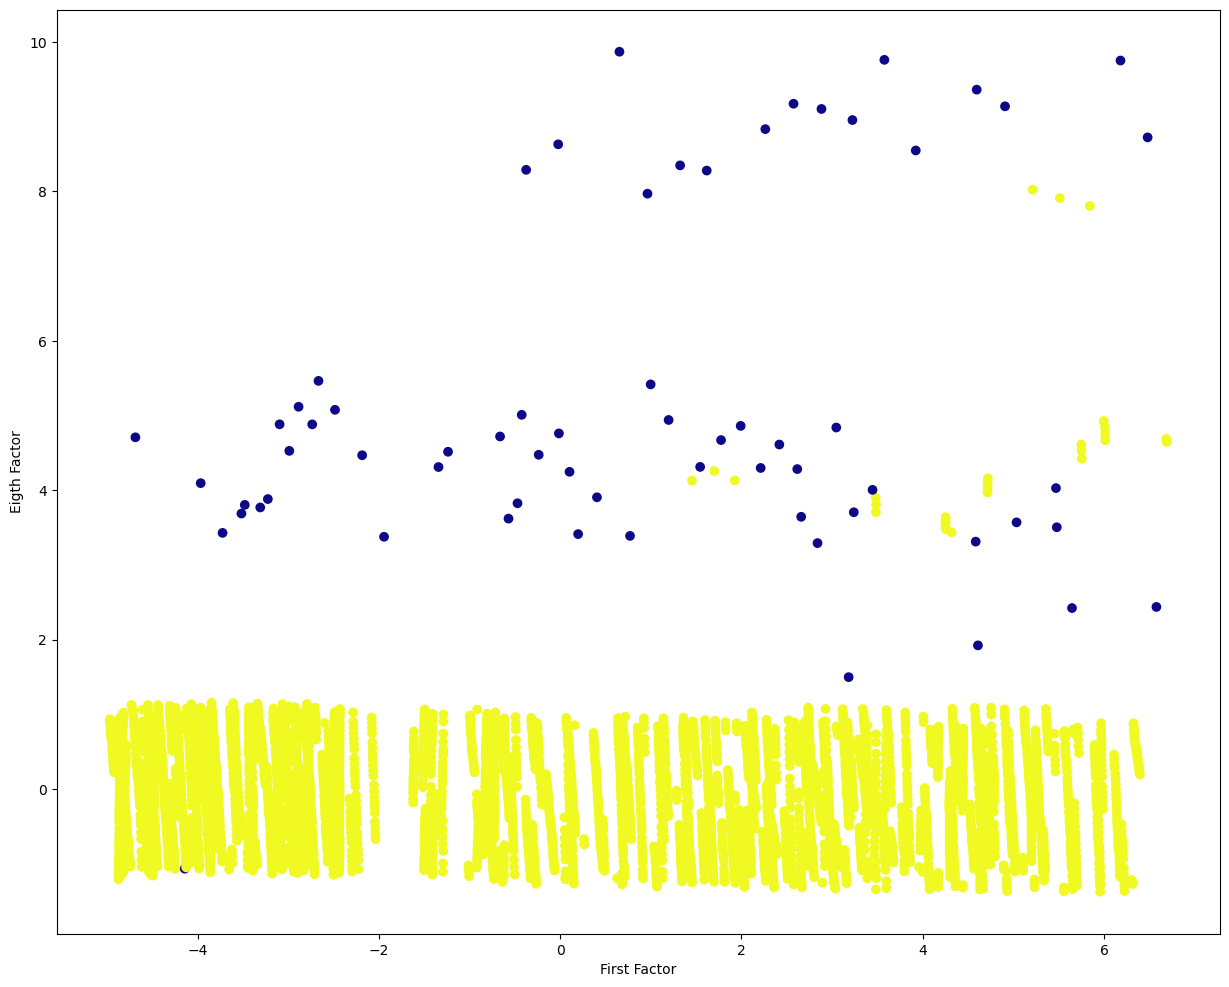

In [23]:
plt.figure(figsize=(15,12))
plt.scatter(X[:,0],X[:,7],c=y,cmap='plasma')
plt.xlabel('First Factor')
plt.ylabel('Eigth Factor')

#  **~Optional** 

In [24]:
X = data_new.drop(['type'],axis=1)

In [25]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [26]:
X_train.shape

(3998, 35)

In [27]:
y_train.shape

(3998, 1)

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier

In [29]:
clf = LocalOutlierFactor(n_neighbors=3, contamination=0.013, novelty=True)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {acc} %")

Accuracy of the model : 97.2 %


In [30]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {acc} %")

Accuracy of the model : 98.3 %


In [31]:
clf = IsolationForest(n_estimators=100)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test , y_pred)*100
print(f"Accuracy of the model : {acc} %")

Accuracy of the model : 49.5 %
